<i><b>Public AI</b></i>
<br>
###  &nbsp;&nbsp; **✎&nbsp;&nbsp;Week 1. OpenCV Basis**
# Section 4. 영상의 기하학 처리(2) 모폴로지 변환

### _Objective_
1. **모폴로지 변환** : 모폴로지 변환에 대해 알아봅니다.<br>
2. **모폴로지 연산** : 모폴로지 변환을 바탕으로 다양한 모폴로지 연산에 대해 알아봅니다.

In [1]:
# 영상처리에 있어서 핵심적인 matplotlib과 opencv , numpy 가져오기
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
if not os.path.exists("mophology_example.jpg"):
    !wget http://opencv-python-tutroals.readthedocs.io/en/latest/_images/j.png
    os.rename("j.png","mophology_example.jpg")
if not os.path.exists("opening_example.jpg"):    
    !wget https://i.imgur.com/HCtr4VQ.png
    os.rename("HCtr4VQ.png","opening_example.jpg")  
if not os.path.exists("closing_example.jpg"):    
    !wget https://i.imgur.com/gQWkM5q.png
    os.rename("gQWkM5q.png","closing_example.jpg")

URL transformed to HTTPS due to an HSTS policy
--2019-12-26 15:27:55--  https://opencv-python-tutroals.readthedocs.io/en/latest/_images/j.png
Resolving opencv-python-tutroals.readthedocs.io... 104.208.221.96
Connecting to opencv-python-tutroals.readthedocs.io|104.208.221.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1126 (1.1K) [image/png]
Saving to: 'j.png'

j.png               100%[===================>]   1.10K  --.-KB/s    in 0s      

2019-12-26 15:27:56 (107 MB/s) - 'j.png' saved [1126/1126]

--2019-12-26 15:27:56--  https://i.imgur.com/HCtr4VQ.png
Resolving i.imgur.com... 151.101.24.193
Connecting to i.imgur.com|151.101.24.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13113 (13K) [image/png]
Saving to: 'HCtr4VQ.png'

HCtr4VQ.png         100%[===================>]  12.81K  --.-KB/s    in 0s      

2019-12-26 15:27:57 (26.3 MB/s) - 'HCtr4VQ.png' saved [13113/13113]

--2019-12-26 15:27:57--  https://i.imgur.com/gQWkM5q.p

# \[ 1. Mophology 변환\]

**모폴로지 변환**은 영상이나 이미지를 형태학적 관점에서 접근하는 기법을 말합니다. 모폴로지 변환은 주로 영상 내 픽셀값 대체에 사용되는데, 이를 응용해서 영상 내 노이즈 제거, 구성 요소들의 결합 및 분리, 강도 피크 검출 등에 이용할 수 있습니다.

## 1. 구조 요소 (Structuring element)

모폴로지 변환을 정의하기 전에 먼저 **구조 요소**에 대해 알아야합니다. 구조 요소는 우리가 Convolution 연산 에서 사용했던 mask와 같은 개념의 작은 크기의 행렬입니다. 이전까지는 `numpy`코드를 사용해 이를 만들었다면, 이번 section에서는 OpenCV의 메소드 중 하나인 `cv2.getStructuringElement`를 사용해 다양한 모양의 구조 요소를 만들어보겠습니다.

### (1) 직사각형 구조 요소

구조 요소 생성 함수인 `cv2.getStructuringElement`에서는 구조 요소의 모양을 결정할 수 있습니다. `cv2.MORPH_RECT`인자를 넣어주면 직사각형 형태의 구조 요소를 생성합니다. 

In [5]:
cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

### (2) 타원형 구조 요소

이번에는 `cv2.MORPH_ELLPSE`인자를 넣어 타원형 모양의 구조 요소를 생성해보겠습니다.

In [6]:
cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,5))

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]], dtype=uint8)

### (3) 십자가형 구조 요소

`CV2.MORPH_CROSS`인자를 넣어주면 십자가형 모양의 구조 요소를 생성할 수 있습니다. 구조 요소 생성 함수의 `anchor`인자를 사용해 고정점의 위치를 설정할 수도 있습니다.

In [7]:
cv2.getStructuringElement(cv2.MORPH_CROSS,(5,10), anchor=(2,3))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

## 2. 팽창과 침식

모폴로지 변환의 가장 기본이 되는 연산은 **팽창(dilation)**과 **침식(erosion)**입니다. 이를 예제 이미지와 함께 살펴보겠습니다.

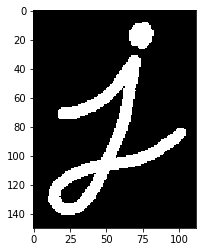

In [8]:
# 구조 요소 설정
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

image = cv2.imread("./mophology_example.jpg", 0)
plt.imshow(image, cmap='gray')
plt.show()

### (1) 팽창(dilation)

팽창 연산은 객체 외곽을 확대하는 연산입니다. 팽창 연산을 수행하면 객체 영역은 확대되고, 배경 영역은 줄어듭니다. 팽창 연산은 구조 요소를 영상 전체에 대해 이동시키면서 이웃한 픽셀을 최대 픽셀값으로 대체합니다.

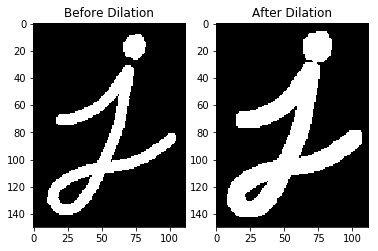

In [9]:
dilation = cv2.dilate(image, kernel, iterations = 1)

plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Before Dilation')
plt.subplot(122)
plt.imshow(dilation, cmap='gray')
plt.title('After Dilation')
plt.show()

팽창 연산을 적용했더니 어두운 영역이 줄어들고 밝은 영역이 늘어난 것을 확인할 수 있습니다.

### (2) 침식(erosion)

침식 연산은 객체 영역의 외곽을 골고루 깎아 내는 연산으로 전체적으로 객체 연역은 축소되고 배경은 확대됩니다. 침식 연산은 구조 요소를 영상 전체에 대해 이동시키면서 이웃한 픽셀을 최소 픽셀값으로 대체합니다.

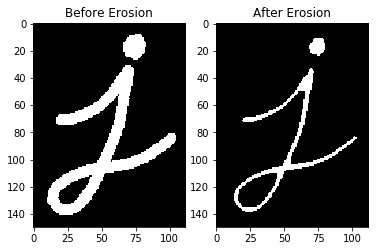

In [10]:
erosion = cv2.erode(image, kernel, iterations = 1)

plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Before Erosion')
plt.subplot(122)
plt.imshow(erosion, cmap='gray')
plt.title('After Erosion')
plt.show()

# \[ 2. Mophology 연산\]

모폴로지 연산은 모폴로지 변환에서 다뤘던 팽창과 침식을 기본 연산으로 사용해 고급 형태학을 적용하는 변환 연산입니다. 변환할 이미지가 binary 이미지라면 팽창과 침식 연산으로도 좋은 결과를 얻을 수 있지만, 그레이스케일이나 다중 채널 이미지를 사용하는 경우 더 복잡한 연산이 필요한데, 이때 모폴로지 연산을 사용하면 좋은 결과를 얻을 수 있습니다.

## 1. 다양한 모폴로지 연산

모폴로지 연산은 cv2에서 제공하는 모폴로지 연산 함수 `cv2.morphologyEX`를 통해 간단하게 구현할 수 있습니다.

### (1) 열림 연산 (Opening)

**열림 연산**은 팽창 연산과 침식 연산의 조합으로, 침식 연산을 적용한 다음 팽창 연산을 적용합니다. 열림 연산을 적용하면 먼저 진행되는 침식 연산으로 밝은 영역이 줄어들고 어두운 영역이 늘어나는데, 줄어든 영역을 다시 복구하기 위해 다시 팽창 연산이 진행되면 반대로 어두운 영역이 줄어들고 밝은 영역이 늘어납니다. 이러한 특징으로 열힘 연산은 주변 픽셀보다 밝은 노이즈를 제거하는 효과가 있습니다.

$$OPENING~=~DILATE(ERODE(IMG))$$

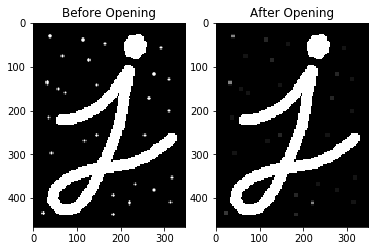

In [11]:
opening_image = cv2.imread("opening_example.jpg", 0)
opening = cv2.morphologyEx(opening_image, cv2.MORPH_OPEN, kernel)

plt.subplot(121)
plt.imshow(opening_image, cmap='gray')
plt.title('Before Opening')
plt.subplot(122)
plt.imshow(opening, cmap='gray')
plt.title('After Opening')
plt.show()

### (2) 닫힘 연산 (Closing)

**닫힘 연산**은 열림 연산과 같이 팽창 연산과 침식 연산의 조합으로, 열림 연산과는 반대로 팽창 연산이 먼저 적용된 후에 침식 연산이 적용됩니다. 닫힘 연산을 적용하면 먼저 진행되는 팽창 연산으로 어두운 영역이 줄어들고 밝은 영역이 늘어나는데, 늘어난 영역을 다시 복구하기 위해 다시 침식 연산이 진행되면 반대로 밝은 영역이 줄어들고 어두운 영역이 늘어납니다. 이런 특징으로 닫힘 연산은 주변 픽셀보다 어두운 노이즈를 제거하는 효과가 있습니다.

$$CLOSING~=~ERODE(DILATE(IMG))$$

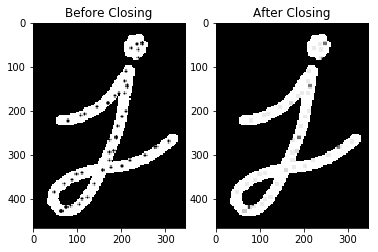

In [9]:
closing_image = cv2.imread("closing_example.jpg", 0)
closing = cv2.morphologyEx(closing_image, cv2.MORPH_CLOSE, kernel)

plt.subplot(121)
plt.imshow(closing_image, cmap='gray')
plt.title('Before Closing')
plt.subplot(122)
plt.imshow(closing, cmap='gray')
plt.title('After Closing')
plt.show()

### (3) Morphological Gradient (Gradient 연산)

**Gradient 연산**은 열림 연산이나 닫힘 연산과는 달리 이미지에 각각 팽창 연산과 침식 연산을 적용한 후 그 둘의 뺄셈 연산을 진행합니다. 입력 이미지와 비교했을 때 팽창 연산은 밝은 영역이 더 크고, 침식 연산은 밝은 영역이 더 작으므로, 둘 사이의 뺄셈의 결과는 객체의 가장자리가 반환됩니다.
$$GRADIENT~=~DILATE(IMG)~-ERODE(IMG)$$

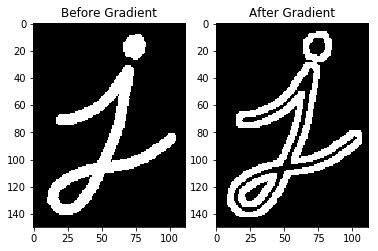

In [12]:
gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)

plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Before Gradient')
plt.subplot(122)
plt.imshow(gradient, cmap='gray')
plt.title('After Gradient')
plt.show()